In [113]:
# https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_695259/327059659.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [114]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
%autoreload

In [116]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [117]:
import scripts
print(scripts.__path__)
import pathlib


from scripts.common.schemas import TypeCollectionCategory
from scripts.infer.structure import DatasetFolderStructure

dataset = DatasetFolderStructure(pathlib.Path(
    "/nfs/home/bsparks/mdti4py/datasets/better-types-4-py-dataset"
))
assert dataset.dataset_root.is_dir(), f"{dataset.dataset_root} not a directory!"

print(dataset)

['/nfs/home/bsparks/mdti4py/scripts/scripts']
BetterTypes4Py @ /nfs/home/bsparks/mdti4py/datasets/better-types-4-py-dataset


In [118]:
import importlib
import experiments.inferred

In [119]:
artifact_root = pathlib.Path("/nfs/home/bsparks/mdti4py/datasets")
assert artifact_root.is_dir(), f"Cannot find {artifact_root=}"

# Ground Truth

In [120]:
groundtruth = experiments.inferred.load_groundtruths(artifact_root, dataset)

/nfs/home/bsparks/mdti4py/datasets/BetterTypes4Py/kornicameister__axion/extended_ground_truth.csv: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 73.43it/s]
/nfs/home/bsparks/mdti4py/datasets/BetterTypes4Py/kornicameister__axion/context.csv: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 148.36it/s]


In [121]:
groundtruth[groundtruth["file"] == "aiosonic/pools.py"].drop(columns=["category", "qname", "repository"])

,file,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno,context_category,nested
34968,aiosonic/pools.py,CyclicQueuePool.__init__,NaN,NaN,NaN,NaN,1,0
34969,aiosonic/pools.py,CyclicQueuePool.__init__.self,NaN,NaN,NaN,NaN,2,0
34970,aiosonic/pools.py,CyclicQueuePool.__init__.connector,NaN,NaN,NaN,NaN,2,0
34971,aiosonic/pools.py,CyclicQueuePool.__init__.pool_size,NaN,NaN,NaN,NaN,2,0
34972,aiosonic/pools.py,CyclicQueuePool.__init__.connection_cls,NaN,NaN,NaN,NaN,2,0
34973,aiosonic/pools.py,CyclicQueuePool.acquire,NaN,NaN,NaN,NaN,1,0
34974,aiosonic/pools.py,CyclicQueuePool.acquire.self,NaN,NaN,NaN,NaN,2,0
34975,aiosonic/pools.py,CyclicQueuePool.acquire._urlparsed,urllib.parse.ParseResult,urllib.parse.ParseResult,ParseResult,ParseResult,2,0
34976,aiosonic/pools.py,CyclicQueuePool.release,NaN,NaN,NaN,NaN,1,0
34977,aiosonic/pools.py,CyclicQueuePool.release.self,NaN,NaN,NaN,NaN,2,0


In [122]:
trivial_mask = groundtruth["adjusted_anno"].isin(["None", "Any"])
groundtruth = groundtruth[~trivial_mask]

groundtruth

,file,category,qname,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno,repository,context_category,nested
0,instark/presenters/rest/helpers/schemas/messag...,VARIABLE,MessageSchema.backend_id,MessageSchema.backend_idλ1,NaN,NaN,NaN,NaN,nubark__instark,3,0
1,instark/presenters/rest/helpers/schemas/messag...,VARIABLE,MessageSchema.recipient_id,MessageSchema.recipient_idλ1,NaN,NaN,NaN,NaN,nubark__instark,3,0
2,instark/presenters/rest/helpers/schemas/messag...,VARIABLE,MessageSchema.title,MessageSchema.titleλ1,NaN,NaN,NaN,NaN,nubark__instark,3,0
3,instark/presenters/rest/helpers/schemas/messag...,VARIABLE,MessageSchema.content,MessageSchema.contentλ1,NaN,NaN,NaN,NaN,nubark__instark,3,0
4,instark/presenters/rest/helpers/schemas/messag...,VARIABLE,MessageSchema.kind,MessageSchema.kindλ1,NaN,NaN,NaN,NaN,nubark__instark,3,0
...,...,...,...,...,...,...,...,...,...,...,...
58474,axion/handler/analysis/path_query_arg.py,VARIABLE,analyze.param_mapping,analyze.param_mappingλ1,"typing.Dict[axion.handler.model.OASParam, axio...","typing.Dict[axion.handler.model.OASParam, axio...","Dict[OASParam, FunctionArgName]",Dict,kornicameister__axion,4,0
58476,axion/handler/analysis/path_query_arg.py,VARIABLE,analyze.handler_param_name,analyze.handler_param_nameλ1,NaN,NaN,NaN,NaN,kornicameister__axion,3,0
58477,axion/handler/analysis/path_query_arg.py,VARIABLE,analyze.handler_param_type,analyze.handler_param_typeλ1,NaN,NaN,NaN,NaN,kornicameister__axion,3,0
58478,axion/handler/analysis/path_query_arg.py,VARIABLE,analyze.op_param_type,analyze.op_param_typeλ1,NaN,NaN,NaN,NaN,kornicameister__axion,3,0


In [123]:
groundtruth[groundtruth["file"] == "aiosonic/pools.py"].drop(columns=["category", "qname", "repository"])

,file,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno,context_category,nested
34968,aiosonic/pools.py,CyclicQueuePool.__init__,NaN,NaN,NaN,NaN,1,0
34969,aiosonic/pools.py,CyclicQueuePool.__init__.self,NaN,NaN,NaN,NaN,2,0
34970,aiosonic/pools.py,CyclicQueuePool.__init__.connector,NaN,NaN,NaN,NaN,2,0
34971,aiosonic/pools.py,CyclicQueuePool.__init__.pool_size,NaN,NaN,NaN,NaN,2,0
34972,aiosonic/pools.py,CyclicQueuePool.__init__.connection_cls,NaN,NaN,NaN,NaN,2,0
34973,aiosonic/pools.py,CyclicQueuePool.acquire,NaN,NaN,NaN,NaN,1,0
34974,aiosonic/pools.py,CyclicQueuePool.acquire.self,NaN,NaN,NaN,NaN,2,0
34975,aiosonic/pools.py,CyclicQueuePool.acquire._urlparsed,urllib.parse.ParseResult,urllib.parse.ParseResult,ParseResult,ParseResult,2,0
34976,aiosonic/pools.py,CyclicQueuePool.release,NaN,NaN,NaN,NaN,1,0
34977,aiosonic/pools.py,CyclicQueuePool.release.self,NaN,NaN,NaN,NaN,2,0


In [124]:
print("=== Label Counts === ")
print(f"{groundtruth.raw_anno.notna().sum()=}, {groundtruth.adjusted_anno.notna().sum()=}, {groundtruth.base_anno.notna().sum()=}")

=== Label Counts === 
groundtruth.raw_anno.notna().sum()=15910, groundtruth.adjusted_anno.notna().sum()=15910, groundtruth.base_anno.notna().sum()=15910


In [125]:
print(groundtruth.raw_anno.value_counts())
print(groundtruth.raw_anno.value_counts(normalize=True))

raw_anno
builtins.str                                                                    3142
builtins.int                                                                    1158
builtins.bool                                                                    809
tests.basilisp.helpers.CompileFn                                                 415
typing.Optional[builtins.str]                                                    278
                                                                                ... 
typing.Dict[builtins.str, wkconnect.backends.neuroglancer.backend.DecoderFn]       1
typing.Optional[wkconnect.backends.neuroglancer.meshes.Meshfile]                   1
typing.List[wkconnect.backends.neuroglancer.backend.Chunk]                         1
wkconnect.backends.neuroglancer.backend.DecoderFn                                  1
typing.Dict[builtins.str, typing.Type[t.Any]]                                      1
Name: count, Length: 2730, dtype: int64
raw_anno
builtin

In [126]:
print(groundtruth.adjusted_anno.value_counts())
print(groundtruth.adjusted_anno.value_counts(normalize=True))

adjusted_anno
str                                                 3515
int                                                 1303
bool                                                 938
CompileFn                                            415
Dict                                                 237
                                                    ... 
List[_PathValidationResultAsJson]                      1
List[_CertificateDeploymentAnalysisResultAsJson]       1
Generator[ServerScanResult, None, None]                1
CompressionScanResultAsJson                            1
Sequence[DV]                                           1
Name: count, Length: 1828, dtype: int64
adjusted_anno
str                                                 0.220930
int                                                 0.081898
bool                                                0.058957
CompileFn                                           0.026084
Dict                                                0.014896


In [127]:
print(groundtruth.base_anno.value_counts())
print(groundtruth.base_anno.value_counts(normalize=True))

base_anno
str                                            3515
int                                            1303
List                                           1017
bool                                            938
Dict                                            726
                                               ... 
InvalidServerStringAsJson                         1
InvalidServerStringError                          1
CertificateInfoExtraArgumentAsJson                1
SessionResumptionSupportExtraArgumentAsJson       1
OASResponseCode                                   1
Name: count, Length: 1133, dtype: int64
base_anno
str                                            0.220930
int                                            0.081898
List                                           0.063922
bool                                           0.058957
Dict                                           0.045632
                                                 ...   
InvalidServerStringAsJson       

In [128]:
groundtruth[groundtruth["file"] == "aiosonic/pools.py"]

,file,category,qname,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno,repository,context_category,nested
34968,aiosonic/pools.py,CALLABLE_RETURN,CyclicQueuePool.__init__,CyclicQueuePool.__init__,NaN,NaN,NaN,NaN,sonic182__aiosonic,1,0
34969,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.self,CyclicQueuePool.__init__.self,NaN,NaN,NaN,NaN,sonic182__aiosonic,2,0
34970,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.connector,CyclicQueuePool.__init__.connector,NaN,NaN,NaN,NaN,sonic182__aiosonic,2,0
34971,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.pool_size,CyclicQueuePool.__init__.pool_size,NaN,NaN,NaN,NaN,sonic182__aiosonic,2,0
34972,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.connection_cls,CyclicQueuePool.__init__.connection_cls,NaN,NaN,NaN,NaN,sonic182__aiosonic,2,0
34973,aiosonic/pools.py,CALLABLE_RETURN,CyclicQueuePool.acquire,CyclicQueuePool.acquire,NaN,NaN,NaN,NaN,sonic182__aiosonic,1,0
34974,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.acquire.self,CyclicQueuePool.acquire.self,NaN,NaN,NaN,NaN,sonic182__aiosonic,2,0
34975,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.acquire._urlparsed,CyclicQueuePool.acquire._urlparsed,urllib.parse.ParseResult,urllib.parse.ParseResult,ParseResult,ParseResult,sonic182__aiosonic,2,0
34976,aiosonic/pools.py,CALLABLE_RETURN,CyclicQueuePool.release,CyclicQueuePool.release,NaN,NaN,NaN,NaN,sonic182__aiosonic,1,0
34977,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.release.self,CyclicQueuePool.release.self,NaN,NaN,NaN,NaN,sonic182__aiosonic,2,0


# Monkeytype

In [129]:
import experiments.predictions
from experiments.pipeline import factory
from experiments.inferred import load_entire_inferred
import pandas as pd

monkeytype_inferred = load_entire_inferred(
    artifact_root, dataset, tool_name="monkeytype", task="all"
)
monkeytype_adjusted = factory(tool="MonkeyType", groundtruth=groundtruth.replace("<MISSING>", pd.NA), inferred=monkeytype_inferred, form="adjusted")
monkeytype_base = factory(tool="MonkeyType", groundtruth=groundtruth.replace("<MISSING>", pd.NA), inferred=monkeytype_inferred, form="base")

/nfs/home/bsparks/mdti4py/datasets/BetterTypes4Py/kornicameister__axion/monkeytype/all/inferred.csv: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 104.57it/s]


Loaded 19 inference artifacts
Initial prediction size: (17567, 8)
Deriving limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17567/17567 [00:00<00:00, 410835.75it/s]


Deriving adjusted form from limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17567/17567 [00:00<00:00, 439725.82it/s]


Size after joining predictions to groundtruth: (25000, 12)
Reduced to evaluatable: (11340, 12)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


Deriving limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17567/17567 [00:00<00:00, 381166.23it/s]


Deriving adjusted form from limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17567/17567 [00:00<00:00, 443300.01it/s]


Deriving base form from adjusted form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17567/17567 [00:00<00:00, 413412.89it/s]


(25000, 12)
Reduced to evaluatable: (11340, 12)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


In [130]:
display(monkeytype_adjusted)

,file,category,qname,qname_ssa,gt_anno,repository,context_category,nested,trait_gt_form,anno,method,topn
1,instark/core/suppliers/common/tenancy/schema_t...,CALLABLE_PARAMETER,SchemaTenantSupplier.__init__.connection,SchemaTenantSupplier.__init__.connection,SchemaConnection,nubark__instark,2,0,SchemaConnection,<MISSING>,NaN,NaN
2,instark/core/suppliers/common/tenancy/schema_t...,CALLABLE_PARAMETER,SchemaTenantSupplier.__init__.zones,SchemaTenantSupplier.__init__.zones,"Dict[str, str]",nubark__instark,2,0,Dict,<MISSING>,NaN,NaN
4,instark/presenters/rest/rest.py,CALLABLE_PARAMETER,RestApplication.__init__.config,RestApplication.__init__.config,Config,nubark__instark,2,0,Config,<MISSING>,NaN,NaN
5,instark/presenters/rest/rest.py,CALLABLE_PARAMETER,RestApplication.__init__.injector,RestApplication.__init__.injector,Injectark,nubark__instark,2,0,Injectark,<MISSING>,NaN,NaN
7,instark/presenters/rest/rest.py,CALLABLE_PARAMETER,RestApplication.run.app,RestApplication.run.app,Application,nubark__instark,2,0,Application,<MISSING>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24994,axion/oas/parser/all_of.py,CALLABLE_PARAMETER,_get_value.b,_get_value.b,V,kornicameister__axion,2,0,V,<MISSING>,NaN,NaN
24996,axion/oas_mypy/conf.py,CALLABLE_PARAMETER,OASPluginConfig.__init__.options,OASPluginConfig.__init__.options,Options,kornicameister__axion,2,0,Options,<MISSING>,NaN,NaN
24997,axion/handler/analysis/path_query_arg.py,CALLABLE_RETURN,analyze,analyze,"Tuple[Set, ParamMapping]",kornicameister__axion,1,0,Tuple,<MISSING>,NaN,NaN
24998,axion/handler/analysis/path_query_arg.py,CALLABLE_PARAMETER,analyze.parameters,analyze.parameters,Sequence[OASParameter],kornicameister__axion,2,0,Sequence,<MISSING>,NaN,NaN


In [131]:
display(mt_adj_perf := experiments.predictions.performance(monkeytype_adjusted.replace("<MISSING>", pd.NA), total=True))

,observations,predictions,unassigned,matches,stracc,relacc
ubiquitous,5071,500,4571,430,0.084796,0.860000
common,1373,73,1300,27,0.019665,0.369863
rare,4896,300,4596,124,0.025327,0.413333
total,11340,873,10467,581,0.051235,0.665521


In [132]:
display(mt_base_perf := experiments.predictions.performance(monkeytype_base.replace("<MISSING>", pd.NA), total=True))

,observations,predictions,unassigned,matches,stracc,relacc
ubiquitous,5071,500,4571,492,0.097022,0.984000
common,1373,73,1300,40,0.029133,0.547945
rare,4896,300,4596,126,0.025735,0.420000
total,11340,873,10467,658,0.058025,0.753723


In [133]:
import experiments.predictions
from experiments.pipeline import factory
from experiments.inferred import load_entire_inferred
import pandas as pd

typet5_inferred = load_entire_inferred(
    artifact_root, dataset, tool_name="TypeT5TopN1", task="all"
)
typet5_adjusted = factory(
    tool="TypeT5TopN1",
    groundtruth=groundtruth,
    inferred=typet5_inferred,
    form="adjusted"
)
typet5_base = factory(
    tool="TypeT5TopN1",
    groundtruth=groundtruth,
    inferred=typet5_inferred,
    form="base"
)

/nfs/home/bsparks/mdti4py/datasets/BetterTypes4Py/kornicameister__axion/TypeT5TopN1/all/inferred.csv: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 150.04it/s]


Loaded 50 inference artifacts
Initial prediction size: (58215, 8)
Deriving limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58215/58215 [00:00<00:00, 214199.16it/s]


Deriving adjusted form from limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58215/58215 [00:00<00:00, 204354.21it/s]
/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


Size after joining predictions to groundtruth: (32049, 12)
Reduced to evaluatable: (13394, 12)
Deriving limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58215/58215 [00:00<00:00, 217056.88it/s]


Deriving adjusted form from limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58215/58215 [00:00<00:00, 211275.59it/s]


Deriving base form from adjusted form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58215/58215 [00:00<00:00, 213216.80it/s]


(32049, 12)
Reduced to evaluatable: (13394, 12)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


In [134]:
display(typet5_adj_perf := experiments.predictions.performance(typet5_adjusted.replace("<MISSING>", pd.NA), total=True))

,observations,predictions,unassigned,matches,stracc,relacc
ubiquitous,6197,5086,1111,4384,0.707439,0.861974
common,1589,1182,407,752,0.473254,0.636210
rare,5608,3996,1612,2781,0.495899,0.695946
total,13394,10264,3130,7917,0.591086,0.771337


In [135]:
display(typet5_base_perf := experiments.predictions.performance(typet5_base.replace("<MISSING>", pd.NA), total=True))

,observations,predictions,unassigned,matches,stracc,relacc
ubiquitous,6197,5086,1111,4676,0.754559,0.919387
common,1589,1182,407,939,0.590938,0.794416
rare,5608,3996,1612,2881,0.513730,0.720971
total,13394,10264,3130,8496,0.634314,0.827747


In [136]:
per_model_columns = ["observations", "predictions", "matches", "stracc", "relacc"]
adj_by_model_scarcity = pd.concat(
    [typet5_adj_perf[per_model_columns], mt_adj_perf[per_model_columns]],
    keys=["TypeT5", "MonkeyType"],
)
adj_by_model_scarcity.index = adj_by_model_scarcity.index.set_names(["model", "scarcity"])

adj_by_scarcity_model = pd.concat([g for _, g in adj_by_model_scarcity.swaplevel().groupby("scarcity", sort=False)])
display(adj_by_scarcity_model)

observations  predictions  matches    stracc    relacc
scarcity   model                                                             
ubiquitous TypeT5              6197         5086     4384  0.707439  0.861974
           MonkeyType          5071          500      430  0.084796  0.860000
common     TypeT5              1589         1182      752  0.473254  0.636210
           MonkeyType          1373           73       27  0.019665  0.369863
rare       TypeT5              5608         3996     2781  0.495899  0.695946
           MonkeyType          4896          300      124  0.025327  0.413333
total      TypeT5             13394        10264     7917  0.591086  0.771337
           MonkeyType         11340          873      581  0.051235  0.665521

In [137]:
ignore = ["gt_anno", "topn", "method"]
common_predictions = typet5_adjusted.drop(columns=ignore).merge(
    monkeytype_adjusted.drop(columns=ignore), 
    how="outer", 
    on=["repository", "category", "file", "qname", "qname_ssa"], 
    suffixes=("_typet5", "_mt")
)
common_predictions = pd.merge(
    left=common_predictions,
    right=groundtruth,
    how="left",
    on=["repository", "category", "file", "qname", "qname_ssa"],
).replace("<MISSING>", pd.NA).dropna(subset=["adjusted_anno", "anno_typet5", "anno_mt"], how="all", axis=0)

In [138]:
aligned = pd.DataFrame()
for relevant in ["adjusted_anno", "anno_typet5", "anno_mt"]:
    aligned[relevant] = common_predictions.index.astype("string") + common_predictions[relevant].fillna(pd.NA)

aligned[["adjusted_anno", "anno_typet5", "anno_mt"]]

,adjusted_anno,anno_typet5,anno_mt
0,0SchemaConnection,0SchemaConnection,<NA>
1,"1Dict[str, str]","1Dict[str, Any]",<NA>
2,2Config,2Config,<NA>
3,3Injectark,3Injectark,<NA>
4,4Application,4Application,<NA>
...,...,...,...
13389,13389V,<NA>,<NA>
13390,13390Options,13390Options,<NA>
13391,"13391Tuple[Set, ParamMapping]","13391Tuple[Set, Dict]",<NA>
13392,13392Sequence[OASParameter],13392List[OASParam],<NA>


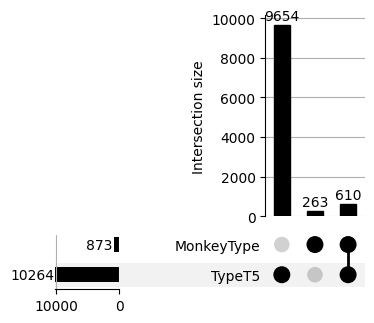

In [139]:
relevant = aligned[["adjusted_anno", "anno_typet5", "anno_mt"]]
gt_anno, typet5, mt = relevant.T.to_dict("records")

contents = {
    #"ground_truth": set(gt_anno.values()),
    "TypeT5": set(typet5.values()).difference({None, pd.NA}),
    "MonkeyType": set(mt.values()).difference({None, pd.NA}),
}

import upsetplot
predictions_by_model = upsetplot.from_contents(contents)
predictions_by_model

upsetplot.UpSet(predictions_by_model, show_counts=True, subset_size='count')

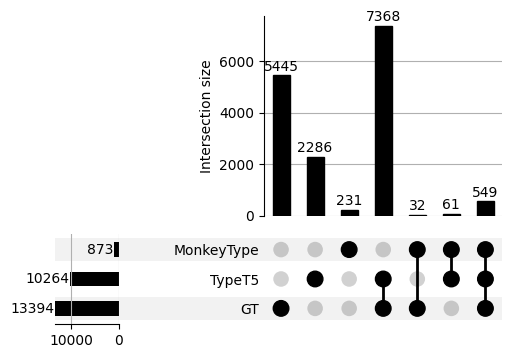

In [140]:
relevant = aligned[["adjusted_anno", "anno_typet5", "anno_mt"]]
gt_anno, typet5, mt = relevant.T.to_dict("records")

contents = {
    "GT": set(gt_anno.values()).difference({None, pd.NA}),
    "TypeT5": set(typet5.values()).difference({None, pd.NA}),
    "MonkeyType": set(mt.values()).difference({None, pd.NA}),
}

import upsetplot
predictions_by_model = upsetplot.from_contents(contents)
predictions_by_model

upsetplot.UpSet(predictions_by_model, show_counts=True, subset_size='count')

In [141]:
thres_figs, ax1 = plt.subplots(nrows=1)

importlib.reload(experiments.predictions)
monkeytype_base_ubiq = experiments.predictions.ubiquitous_types(monkeytype_base.replace("<MISSING>", pd.NA))

ax1.set_title('MonkeyType')
co_occurrences(monkeytype_base_ubiq, truth="gt_anno", pred="anno", threshold=0.08, figsize=(5, 10), ax=ax1)

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
monkeytype_adjusted[["gt_anno", "anno" ]].value_counts()

In [ ]:
monkeytype_base[["gt_anno", "anno" ]].value_counts()